In [9]:
# Plot the data we get from running instrumented lean on speedcenter.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
from scipy.stats import gmean
import seaborn as sns
import matplotlib

def setGlobalDefaults():
    ## Use TrueType fonts instead of Type 3 fonts
    #
    # Type 3 fonts embed bitmaps and are not allowed in camera-ready submissions
    # for many conferences. TrueType fonts look better and are accepted.
    # This follows: https://www.conference-publishing.com/Help.php
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42

    ## Enable tight_layout by default
    #
    # This ensures the plot has always sufficient space for legends, ...
    # Without this sometimes parts of the figure would be cut off.
    matplotlib.rcParams['figure.autolayout'] = True

    ## Legend defaults
    matplotlib.rcParams['legend.frameon'] = False
    
    # Hide the right and top spines
    #
    # This reduces the number of lines in the plot. Lines typically catch
    # a readers attention and distract the reader from the actual content.
    # By removing unnecessary spines, we help the reader to focus on
    # the figures in the graph.
    matplotlib.rcParams['axes.spines.right'] = False
    matplotlib.rcParams['axes.spines.top'] = False

matplotlib.rcParams['figure.figsize'] = 5, 2

# Color palette
light_gray = "#cacaca"
dark_gray = "#827b7b"
light_blue = "#a6cee3"
dark_blue = "#1f78b4"
light_green = "#b2df8a"
dark_green = "#33a02c"
light_red = "#fb9a99"
dark_red = "#e31a1c"
black = "#000000"
white = "#ffffff"
setGlobalDefaults()

%pwd
%ls outputs/benchmarks-allocator-log-noreuse.csv

outputs/benchmarks-allocator-log-noreuse.csv


In [11]:
noreuse = pd.read_csv('outputs/benchmarks-allocator-log-noreuse.csv',
  names=["File", "Metric", "Value"])
reuse = pd.read_csv('outputs/benchmarks-allocator-log-reuse.csv', 
                      names=["File", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

reuse = reuse.groupby(['File', 'Metric'])['Value'].apply(gmean).reset_index()
noreuse = noreuse.groupby(['File', 'Metric'])['Value'].apply(gmean).reset_index()

noreuse


,File,Metric,Value
0,rbmap_checkpoint.lean,rss,2428108800
1,rbmap_checkpoint.lean,num_alloc,2874
2,rbmap_checkpoint.lean,num_small_alloc,60683888
3,rbmap_checkpoint.lean,num_dealloc,56
4,rbmap_checkpoint.lean,num_small_dealloc,60673473
...,...,...,...
400,unionfind.lean,num_small_dealloc,152405628
401,unionfind.lean,num_segments,10
402,unionfind.lean,num_pages,9428
403,unionfind.lean,num_exports,0


reuse


,File,Metric,Value
0,rbmap_checkpoint.lean,rss,2427715584
1,rbmap_checkpoint.lean,num_alloc,2874
2,rbmap_checkpoint.lean,num_small_alloc,60683887
3,rbmap_checkpoint.lean,num_dealloc,56
4,rbmap_checkpoint.lean,num_small_dealloc,60673472
...,...,...,...
400,unionfind.lean,num_small_dealloc,152405628
401,unionfind.lean,num_segments,10
402,unionfind.lean,num_pages,9428
403,unionfind.lean,num_exports,0


,File,Metric,Value
0,binarytrees.lean,num_alloc,2.941000e+03
1,binarytrees.lean,num_dealloc,1.200000e+02
2,binarytrees.lean,num_exports,0.000000e+00
3,binarytrees.lean,num_pages,2.165400e+04
4,binarytrees.lean,num_recycled_pages,6.102060e+05
...,...,...,...
76,unionfind.lean,num_recycled_pages,1.825700e+04
77,unionfind.lean,num_segments,1.000000e+01
78,unionfind.lean,num_small_alloc,1.524160e+08
79,unionfind.lean,num_small_dealloc,1.524056e+08


,File,Metric,Value
0,binarytrees.lean,num_alloc,2.941000e+03
1,binarytrees.lean,num_dealloc,1.200000e+02
2,binarytrees.lean,num_exports,0.000000e+00
3,binarytrees.lean,num_pages,2.165400e+04
4,binarytrees.lean,num_recycled_pages,6.102060e+05
...,...,...,...
76,unionfind.lean,num_recycled_pages,1.825700e+04
77,unionfind.lean,num_segments,1.000000e+01
78,unionfind.lean,num_small_alloc,1.524160e+08
79,unionfind.lean,num_small_dealloc,1.524056e+08


In [12]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(df_merged)
    

                     File              Metric   Value_reuse  Value_no_reuse
0        binarytrees.lean           num_alloc  2.941000e+03    2.941000e+03
1        binarytrees.lean         num_dealloc  1.200000e+02    1.200000e+02
2        binarytrees.lean         num_exports  0.000000e+00    0.000000e+00
3        binarytrees.lean           num_pages  2.165400e+04    2.165400e+04
4        binarytrees.lean  num_recycled_pages  6.102060e+05    6.102060e+05
5        binarytrees.lean        num_segments  2.600000e+01    2.600000e+01
6        binarytrees.lean     num_small_alloc  3.054964e+08    3.054964e+08
7        binarytrees.lean   num_small_dealloc  3.054860e+08    3.054860e+08
8        binarytrees.lean                 rss  1.837105e+08    1.838678e+08
9         const_fold.lean           num_alloc  2.941000e+03    2.941000e+03
10        const_fold.lean         num_dealloc  1.200000e+02    1.200000e+02
11        const_fold.lean         num_exports  0.000000e+00    0.000000e+00
12        co

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,liasolver.lean,5.009019e+07,5.190097e+07,1.810774e+06,3.488902,0.034889
1,qsort.lean,1.082636e+07,1.087866e+07,5.230367e+04,0.480792,0.004808
2,rbmap.lean,9.175036e+07,9.188147e+07,1.311094e+05,0.142694,0.001427
3,unionfind.lean,1.074610e+08,1.075674e+08,1.064193e+05,0.098933,0.000989
4,binarytrees.lean,1.837105e+08,1.838678e+08,1.573089e+05,0.085555,0.000856
5,deriv.lean,4.523557e+08,4.524867e+08,1.310644e+05,0.028965,0.000290
6,rbmap_fbip.lean,1.168900e+08,1.169162e+08,2.619677e+04,0.022406,0.000224
7,rbmap_checkpoint.lean,2.428109e+09,2.428240e+09,1.310791e+05,0.005398,0.000054
8,const_fold.lean,1.837629e+08,1.837629e+08,0.000000e+00,0.000000,0.000000


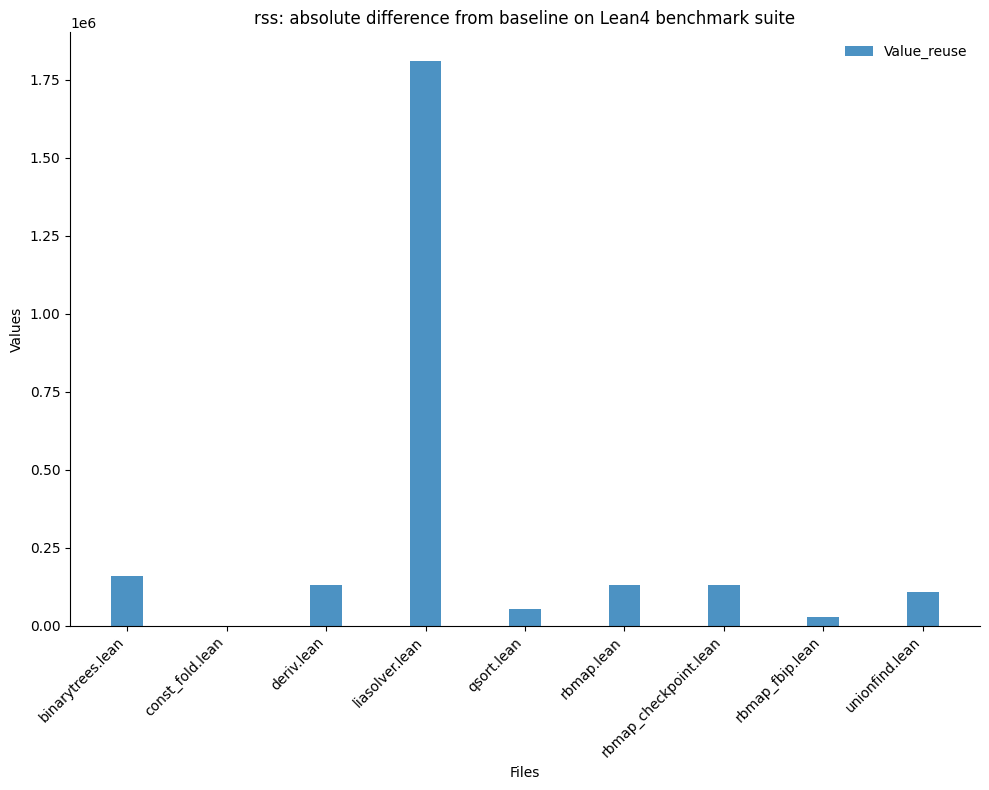

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,const_fold.lean,305496446.0,3.054964e+08,1.000000,3.273360e-07,3.273360e-09
1,binarytrees.lean,305496446.4,3.054964e+08,0.000001,3.511935e-13,3.511935e-15
2,qsort.lean,32953031.6,3.295303e+07,0.000000,0.000000e+00,0.000000e+00
3,rbmap_checkpoint.lean,60683887.4,6.068389e+07,0.000000,0.000000e+00,0.000000e+00
4,rbmap_fbip.lean,115356732.8,1.153567e+08,-0.200000,-1.733753e-07,-1.733753e-09
5,unionfind.lean,152416049.6,1.524160e+08,-0.400000,-2.624397e-07,-2.624397e-09
6,deriv.lean,25927460.8,2.592746e+07,-0.400000,-1.542766e-06,-1.542766e-08
7,rbmap.lean,2011010.8,2.011011e+06,-0.200000,-9.945249e-06,-9.945249e-08
8,liasolver.lean,8261185.4,8.261166e+06,-19.200000,-2.324127e-04,-2.324127e-06


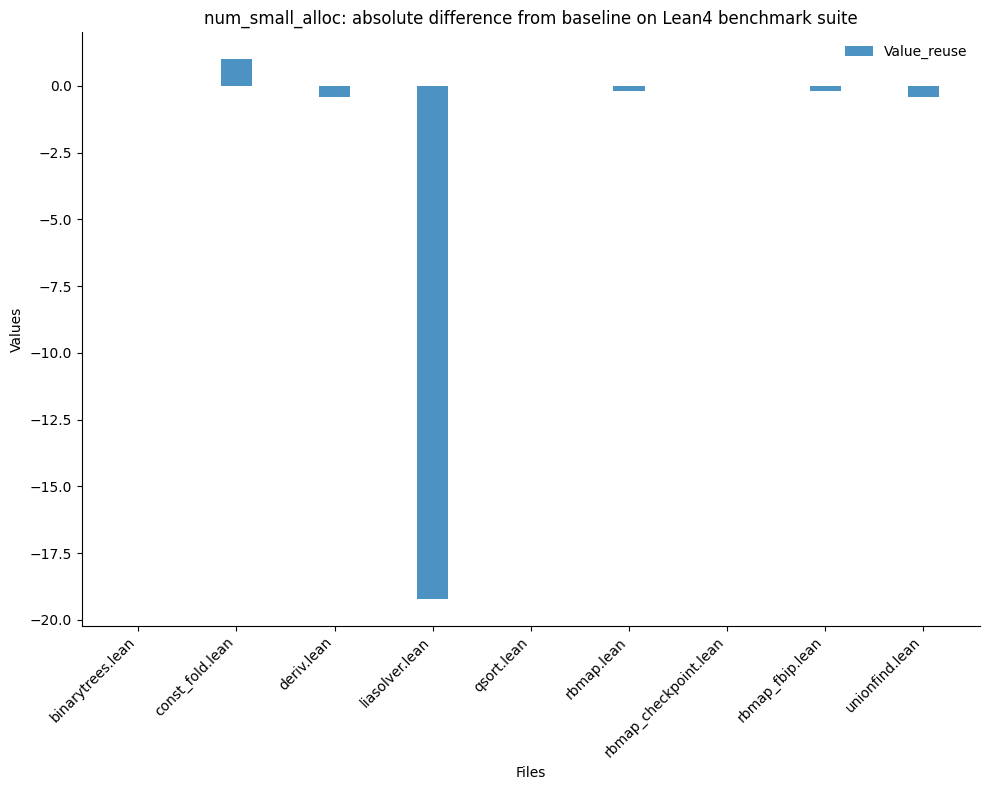

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,const_fold.lean,305486030.0,3.054860e+08,0.999999,3.273470e-07,3.273470e-09
1,binarytrees.lean,305486030.4,3.054860e+08,0.000000,0.000000e+00,0.000000e+00
2,qsort.lean,32942590.6,3.294259e+07,0.000000,0.000000e+00,0.000000e+00
3,rbmap_checkpoint.lean,60673472.4,6.067347e+07,0.000000,0.000000e+00,0.000000e+00
4,rbmap_fbip.lean,115346321.8,1.153463e+08,-0.200000,-1.733909e-07,-1.733909e-09
5,unionfind.lean,152405628.6,1.524056e+08,-0.400000,-2.624574e-07,-2.624574e-09
6,deriv.lean,25917028.8,2.591703e+07,-0.400000,-1.543387e-06,-1.543387e-08
7,rbmap.lean,2000599.8,2.000600e+06,-0.200000,-9.997004e-06,-9.997004e-08
8,liasolver.lean,8117409.4,8.117401e+06,-8.200000,-1.010176e-04,-1.010176e-06


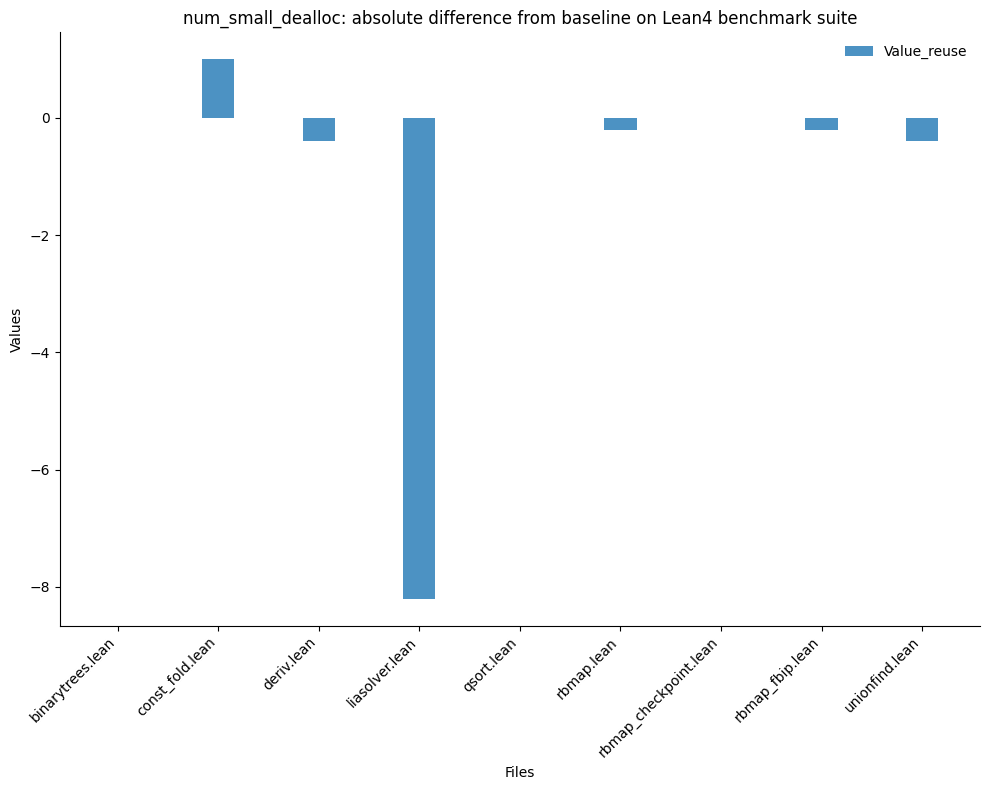

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,binarytrees.lean,2941.0,2941.0,0.0,0.000000,0.000000
1,const_fold.lean,2941.0,2941.0,0.0,0.000000,0.000000
2,deriv.lean,2915.0,2915.0,0.0,0.000000,0.000000
3,qsort.lean,1082080.0,1082080.0,0.0,0.000000,0.000000
4,rbmap.lean,2868.0,2868.0,0.0,0.000000,0.000000
5,rbmap_checkpoint.lean,2874.0,2874.0,0.0,0.000000,0.000000
6,rbmap_fbip.lean,2868.0,2868.0,0.0,0.000000,0.000000
7,unionfind.lean,2896.0,2896.0,0.0,0.000000,0.000000
8,liasolver.lean,65075.0,65065.0,-10.0,-0.015369,-0.000154


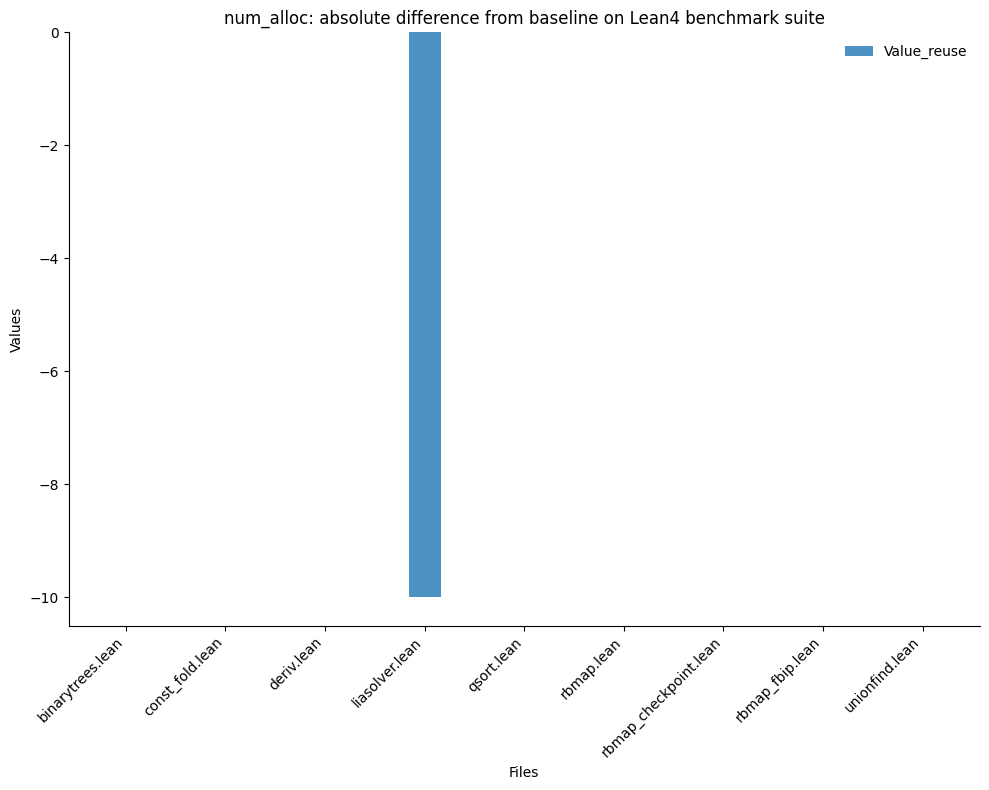

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,binarytrees.lean,120.0,120.0,0.0,0.000000,0.000000
1,const_fold.lean,120.0,120.0,0.0,0.000000,0.000000
2,deriv.lean,91.0,91.0,0.0,0.000000,0.000000
3,qsort.lean,1079251.0,1079251.0,0.0,0.000000,0.000000
4,rbmap.lean,53.0,53.0,0.0,0.000000,0.000000
5,rbmap_checkpoint.lean,56.0,56.0,0.0,0.000000,0.000000
6,rbmap_fbip.lean,53.0,53.0,0.0,0.000000,0.000000
7,unionfind.lean,74.0,74.0,0.0,0.000000,0.000000
8,liasolver.lean,36046.0,36043.0,-3.0,-0.008323,-0.000083


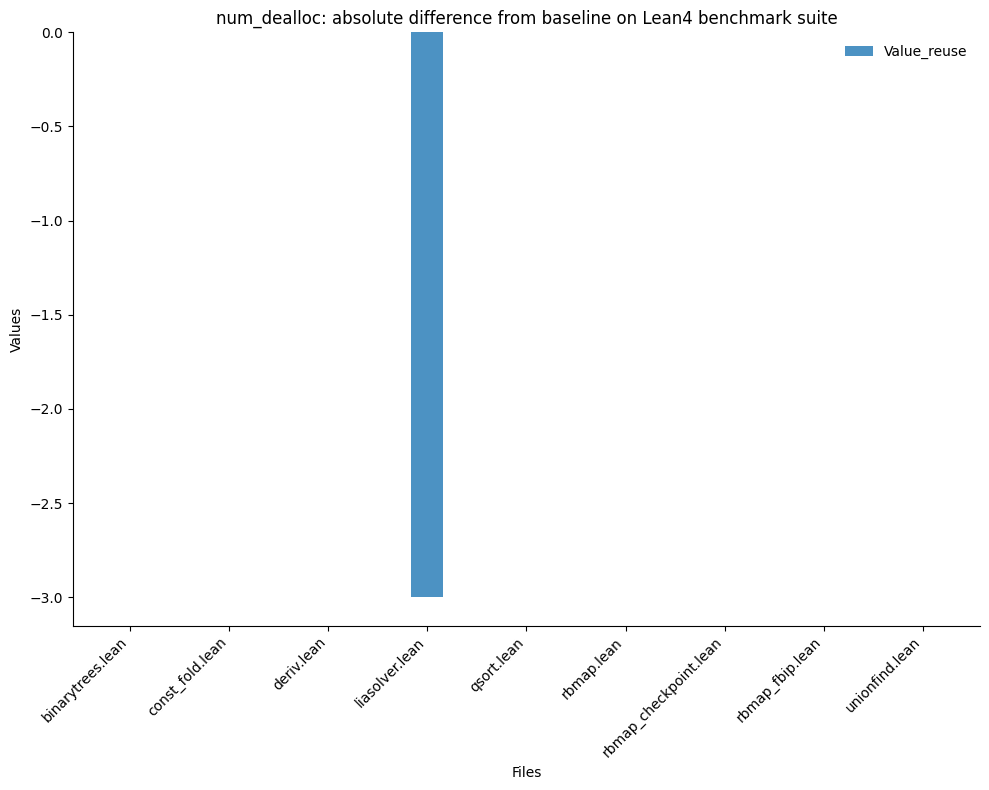

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,liasolver.lean,1425.0,1426.0,1.0,0.070126,0.000701
1,binarytrees.lean,21654.0,21654.0,0.0,0.000000,0.000000
2,const_fold.lean,21654.0,21654.0,0.0,0.000000,0.000000
3,deriv.lean,54403.0,54403.0,0.0,0.000000,0.000000
4,qsort.lean,552.0,552.0,0.0,0.000000,0.000000
5,rbmap.lean,10405.0,10405.0,0.0,0.000000,0.000000
6,rbmap_checkpoint.lean,295480.0,295480.0,0.0,0.000000,0.000000
7,rbmap_fbip.lean,13477.0,13477.0,0.0,0.000000,0.000000
8,unionfind.lean,9428.0,9428.0,0.0,0.000000,0.000000


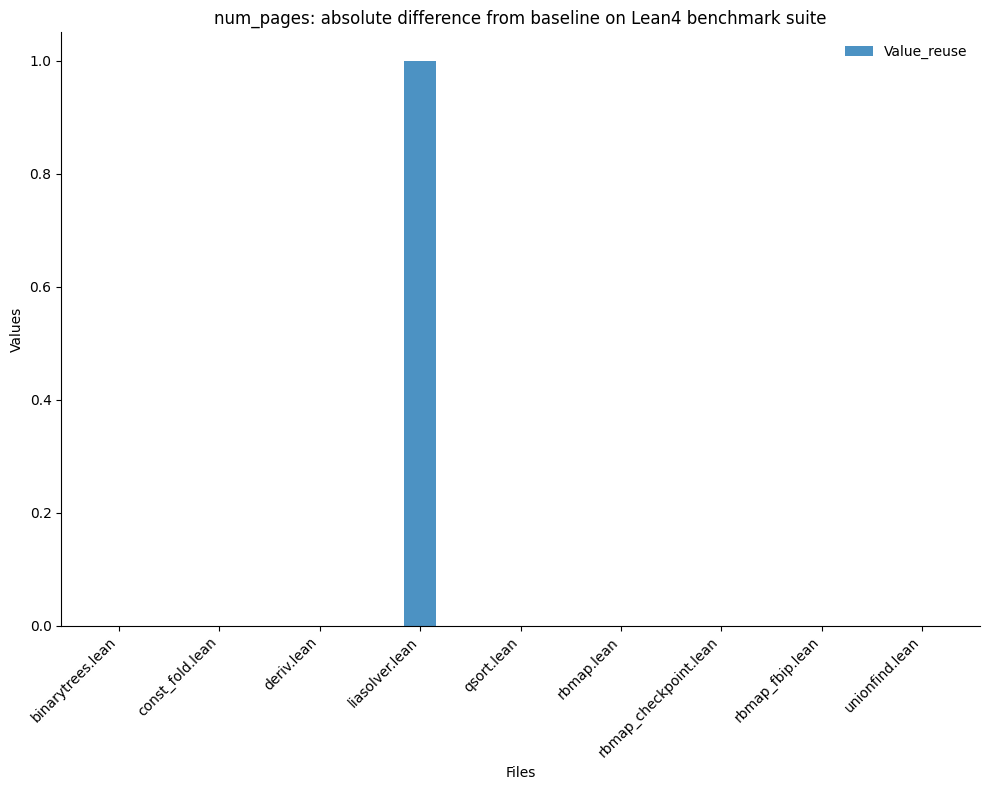

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease,xDecrease
0,binarytrees.lean,610206.0,610206.0,0.0,0.0,0.0
1,const_fold.lean,610206.0,610206.0,0.0,0.0,0.0
2,deriv.lean,53855.0,53855.0,0.0,0.0,0.0
3,liasolver.lean,7583.0,7583.0,0.0,0.0,0.0
4,rbmap.lean,9852.0,9852.0,0.0,0.0,0.0
5,rbmap_checkpoint.lean,294927.0,294927.0,0.0,0.0,0.0
6,rbmap_fbip.lean,63593.0,63593.0,0.0,0.0,0.0
7,unionfind.lean,18257.0,18257.0,0.0,0.0,0.0
8,qsort.lean,0.0,0.0,0.0,NaN,NaN


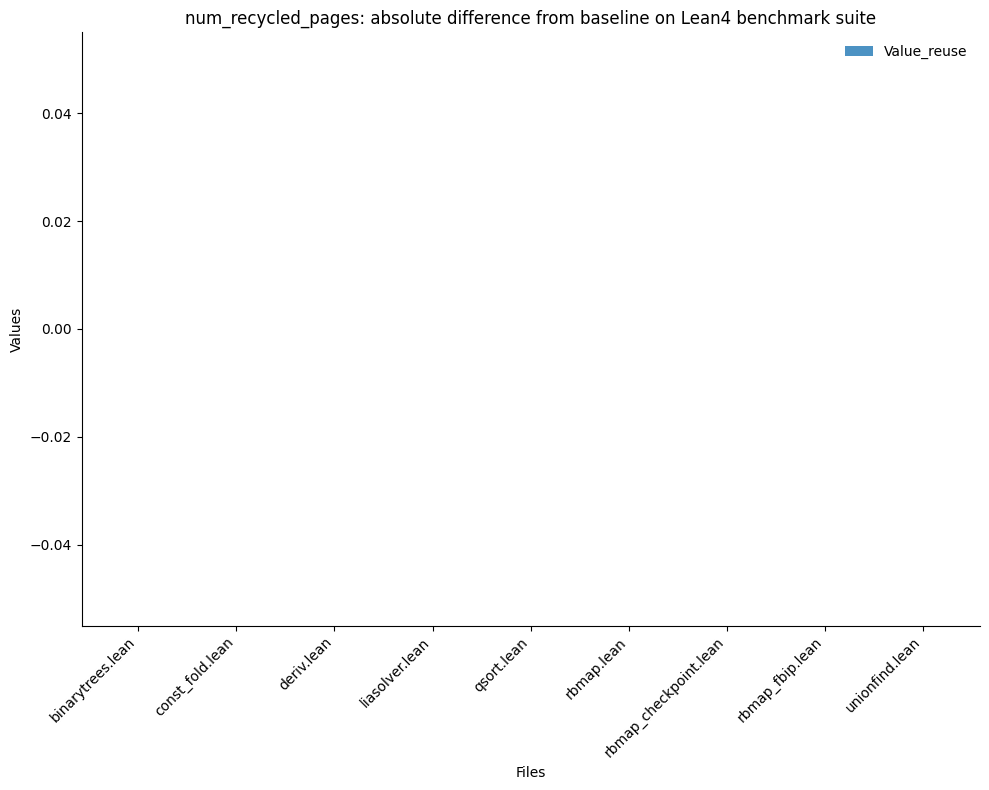

In [15]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 
metrics = df_merged['Metric'].unique()
files = df_merged["File"].unique()

for metric in ["rss", "num_small_alloc", "num_small_dealloc", "num_alloc",  "num_dealloc", "num_pages", "num_recycled_pages"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric["xDecrease"] = (
    (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )

  df_metric = df_metric.drop(["Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  # df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  
  fig, ax = plt.subplots(figsize=(10, 8))

  index = range(len(files))

  bar_width = 0.32
  opacity = 0.8

  reuse_bar = ax.bar(index, df_metric['absolute_diff'], bar_width, alpha=opacity, label='Value_reuse')

  ax.set_xlabel('Files')
  ax.set_ylabel('Values')
  ax.set_title(f'{metric}: absolute difference from baseline on Lean4 benchmark suite')
  ax.set_xticks([p for p in index])
  ax.set_xticklabels(files, rotation=45, ha="right")
  ax.legend()

  plt.tight_layout()
  plt.show()

# corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
# plt.figure(figsize=(12,8))
# sns.heatmap(corr, cmap="Greens",annot=True)
